<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B7%D0%B0%D0%B4%D0%B5%D1%80%D0%B6%D0%BA%D0%B8%20%D1%80%D0%B5%D0%B9%D1%81%D0%B0%20%D0%B8%D0%B7%20%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт Библиотек

In [1]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model # 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler # 
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# Предсказание задержки рейса, по промежуточному результату

In [6]:
!unzip '/content/drive/MyDrive/Numpy/Датасет по задержке рейса.zip'

Archive:  /content/drive/MyDrive/Numpy/Датасет по задержке рейса.zip
replace airlines_delay.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: airlines_delay.csv      


In [7]:
df = pd.read_csv('/content/airlines_delay.csv', encoding = 'cp1251', header=0)
print(df.shape)  

(539382, 8)


In [8]:
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [9]:
Xtrain = np.array(df[['DayOfWeek', 'Class', 'Length']].astype('int')) # Преобразуем данные в numpy
Ytrain = np.array(df['Time'].astype('int'))# Преобразуем данные в numpy

In [10]:
x_train, x_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.25) # Разбиваем по выборкам

In [11]:
model = Sequential() # создаем простую модель
model.add(Dense(500,input_dim=3, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="MSE", optimizer="adam") # MSE(средняя квадратичная ошибка)

In [12]:
history = model.fit(x_train, y_train,  
                    batch_size=64, 
                    epochs=128,
                    validation_data=(x_test, y_test),
                    verbose=1, shuffle=True)

Epoch 1/128
6321/6321 [==============================] - 27s 4ms/step - loss: 88514.2734 - val_loss: 75965.3281
Epoch 2/128
6321/6321 [==============================] - 23s 4ms/step - loss: 76259.5312 - val_loss: 76696.5547
Epoch 3/128
6321/6321 [==============================] - 23s 4ms/step - loss: 76147.7422 - val_loss: 75443.6875
Epoch 4/128
6321/6321 [==============================] - 24s 4ms/step - loss: 76063.8047 - val_loss: 75455.4141
Epoch 5/128
6321/6321 [==============================] - 24s 4ms/step - loss: 76052.4922 - val_loss: 76804.2578
Epoch 6/128
6321/6321 [==============================] - 23s 4ms/step - loss: 75984.3438 - val_loss: 75312.8906
Epoch 7/128
6321/6321 [==============================] - 23s 4ms/step - loss: 75863.7969 - val_loss: 76535.4375
Epoch 8/128
6321/6321 [==============================] - 24s 4ms/step - loss: 75872.2578 - val_loss: 77076.0391
Epoch 9/128
6321/6321 [==============================] - 22s 3ms/step - loss: 75817.9531 - val_loss: 762

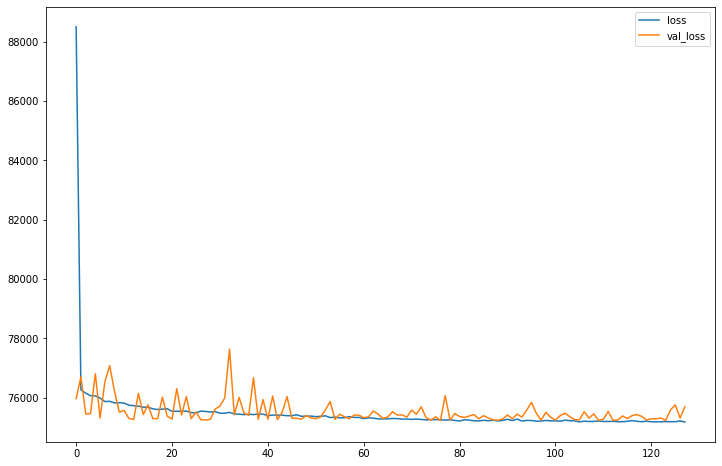

In [17]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
pred = model.predict(x_test)
for i in range(len(pred[:10])): # Выводим результаты
    print('Данные -',x_test[i],'  Предсказание -',pred[i],'   Результат -', y_test[i])

4214/4214 [==============================] - 6s 2ms/step
Данные - [ 2  1 50]   Предсказание - [900.73663]    Результат - 830
Данные - [ 3  1 65]   Предсказание - [896.82587]    Результат - 990
Данные - [ 7  0 62]   Предсказание - [828.14795]    Результат - 665
Данные - [ 7  0 88]   Предсказание - [803.0296]    Результат - 1022
Данные - [ 2  0 41]   Предсказание - [841.06036]    Результат - 302
Данные - [  6   0 151]   Предсказание - [769.8623]    Результат - 710
Данные - [  1   1 118]   Предсказание - [872.1733]    Результат - 945
Данные - [ 3  1 65]   Предсказание - [896.82587]    Результат - 1175
Данные - [ 3  0 75]   Предсказание - [796.0604]    Результат - 1025
Данные - [  7   0 250]   Предсказание - [766.38824]    Результат - 450


In [15]:
def func_predict(data): # Простая функция линейной зависимости
    return (data[0]/data[2])*2400+(data[1]/data[2])*2400

func_pred=[] # создаем пустой список
for i in x_test: # в цикле заполняем списко предсказаниями функции на основе данных
    func_pred.append(round(func_predict(i)))

for i in range(len(x_test[:20])):# Выводим результаты
    print('Данные -',x_test[i],'  Предсказание сети -',pred[i],' Предсказание функции' ,func_pred[i],'   Результат -', y_test[i])

Данные - [ 2  1 50]   Предсказание сети - [900.73663]  Предсказание функции 144    Результат - 830
Данные - [ 3  1 65]   Предсказание сети - [896.82587]  Предсказание функции 148    Результат - 990
Данные - [ 7  0 62]   Предсказание сети - [828.14795]  Предсказание функции 271    Результат - 665
Данные - [ 7  0 88]   Предсказание сети - [803.0296]  Предсказание функции 191    Результат - 1022
Данные - [ 2  0 41]   Предсказание сети - [841.06036]  Предсказание функции 117    Результат - 302
Данные - [  6   0 151]   Предсказание сети - [769.8623]  Предсказание функции 95    Результат - 710
Данные - [  1   1 118]   Предсказание сети - [872.1733]  Предсказание функции 41    Результат - 945
Данные - [ 3  1 65]   Предсказание сети - [896.82587]  Предсказание функции 148    Результат - 1175
Данные - [ 3  0 75]   Предсказание сети - [796.0604]  Предсказание функции 96    Результат - 1025
Данные - [  7   0 250]   Предсказание сети - [766.38824]  Предсказание функции 67    Результат - 450
Данные

In [16]:
err = mean_squared_error(y_test,pred) # Считаем MSE для предикта сети
err2 = mean_squared_error(y_test,func_pred)# Считаем MSE для предикта функции
avg_error = mean_absolute_error(y_test,pred)# Получаем среднюю абсолютную ошибку
print("MAE сети :", avg_error, 'MSE сети', err)# выводим ошибки сети
avg_error2 = mean_absolute_error(y_test,func_pred)#Получаем среднюю абсолютную ошибку
print("MAE функции :", avg_error2, 'MSE функции', err2)# выводим ошибки функции

MAE сети : 234.87964996722172 MSE сети 75687.69456271453
MAE функции : 702.0791569642407 MSE функции 572810.2512644053
